

## Crime Data

Hierarchical Clustering

In [1]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [2]:
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
df_norm = norm_func(crime.iloc[:,1:])

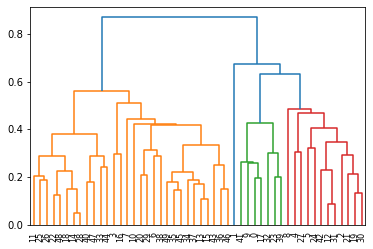

In [5]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [6]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [7]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,3
1,2
2,1
3,0
4,1


In [8]:
pd.concat([crime,Clusters],axis=1).head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


K-means Clustering

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 


In [10]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [11]:
model=KMeans(n_clusters=5).fit(df_norm)
model.labels_ 

array([2, 1, 1, 3, 1, 1, 4, 3, 1, 2, 4, 0, 1, 3, 0, 3, 3, 2, 0, 1, 4, 1,
       0, 2, 3, 3, 3, 1, 0, 4, 1, 1, 2, 0, 4, 3, 3, 4, 4, 2, 0, 2, 1, 4,
       0, 3, 4, 0, 0, 3])

In [12]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [13]:
crime.iloc[:,1:5].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,2.680000,70.100000,51.000000,10.910000
1,10.966667,264.000000,76.500000,33.608333
2,14.671429,251.285714,54.285714,21.685714
3,6.975000,148.416667,62.333333,19.775000
4,4.955556,125.444444,80.111111,17.788889


In [14]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


DBSCAN Clustering

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [16]:
crime1=pd.read_csv("crime_data.csv")
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
array=crime1.iloc[:,1:].values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [18]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [19]:
dbscan = DBSCAN(eps=0.7, min_samples=5)  #MinPts>=D+1
dbscan.fit(X)

DBSCAN(eps=0.7)

In [20]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1],
      dtype=int64)

In [21]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [22]:
crime1=pd.concat([crime1,cl],axis=1)

In [23]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1



# Airlines Data

Hierarchical Clustering

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [25]:
airline=pd.read_csv("EastWestAirlines (1).csv")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
airline= airline.rename(columns={'ID#':'ID', 'Award?':'Award'})
airline


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
airline1 =  airline.drop(['ID','Award'], axis=1)
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [28]:
def norm_func(y):
    x = (y-y.min())/(y.max()-y.min())
    return (x)

In [29]:
airline2_norm=norm_func(airline1.iloc[:,0:])

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(airline2_norm, method='average'))


In [ ]:
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(airline2_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

In [ ]:
airline5=pd.concat([airline,Clusters],axis=1)
airline5

K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [ ]:
airline2_norm.head()

In [ ]:
model=KMeans(n_clusters=7).fit(airline2_norm)
model.labels_ 

In [ ]:
md=pd.Series(model.labels_)   
md['clust']=md 
airline2_norm.head()

In [ ]:
airline1.iloc[:,:].groupby(airline1.clust).mean()

In [ ]:
airline1.head()

DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
airline=pd.read_csv("EastWestAirlines.csv")
airline.head()

In [ ]:
airline6 =  airline.drop(['ID#','Award?'], axis=1)
airline6

In [ ]:
array1=airline6.iloc[:,:].values
array1

In [ ]:
stscaler = StandardScaler().fit(array1)
X = stscaler.transform(array1)
X

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=7)  #MinPts>=D+1
dbscan.fit(X)

In [ ]:
dbscan.labels_

In [ ]:
clu=pd.DataFrame(dbscan.labels_,columns=['cluster'])
clu